# Import packages

In [1]:
import pandas as pd
import fuzzy
import jellyfish
from rapidfuzz import fuzz
from rapidfuzz import process


### Text to speech

Here we will use the pyttsx3 package to generate speech from text data. We will save it as a test mp3 file.

In [7]:
import pyttsx3
# pyttsx3.speak("Frickin Chicken, Frickin Chicken, Frickin Chicken, Frickin Chicken")
# pyttsx3.speak("Flipn Chicken, Flipn Chicken, Flipn Chicken, Flipn Chicken")

engine = pyttsx3.init()
engine.save_to_file('Frickin Chicken, Frickin Chicken, Frickin Chicken, Frickin Chicken', 'test.mp3')
engine.runAndWait()

Import the mp3 file and read it in with librosa.

In [8]:
import librosa
audio_path = 'test.mp3'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

print(x.shape, sr)


<class 'numpy.ndarray'> <class 'int'>
(88528,) 22050


In [9]:
librosa.load(audio_path, sr=44100)

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

In [10]:
librosa.load(audio_path, sr=None)

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050)

In [11]:
import IPython.display as ipd
ipd.Audio(audio_path)

Get the spectrogram of `Frickin Chicken`

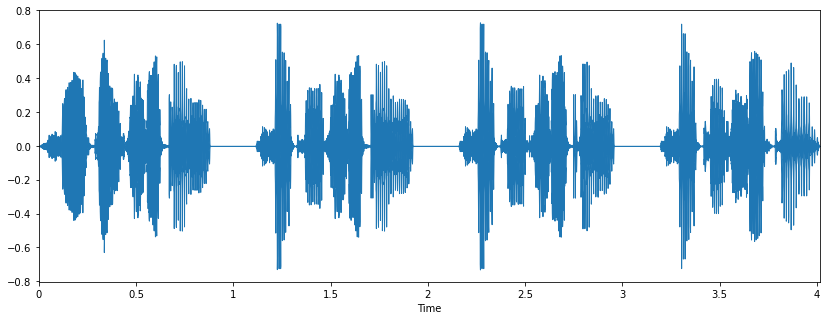

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

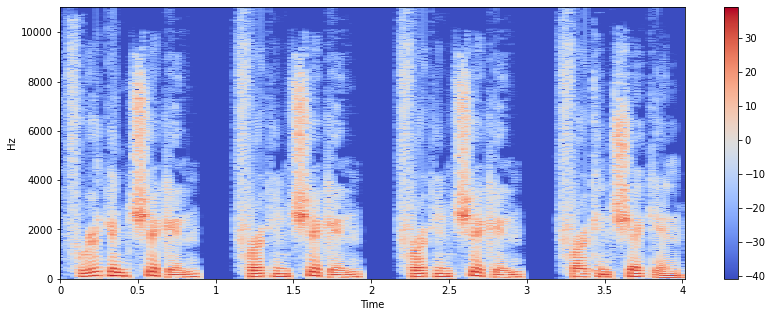

In [13]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

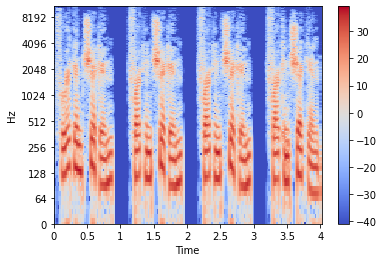

In [14]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Converting mp3 to a wav

In [ ]:
from pydub import AudioSegment

def convert_to_wav(filename):
    # Import audio file
    audio = AudioSegment.from_file(filename)
    
    # Create new filename
    new_filename = filename.split(".")[0] + ".wav"
    
    # Export file as .wav
    audio.export(new_filename, format="wav")
    print(f"Converting {filename} to {new_filename}...")

In [ ]:
convert_to_wav('test.mp3')

In [ ]:
import acoustid
import chromaprint
duration, fp_encoded = acoustid.fingerprint_file('test.mp3')
fingerprint, version = chromaprint.decode_fingerprint(fp_encoded)
print(fingerprint)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
...
fig = plt.figure()
bitmap = np.transpose(np.array([[b == '1' for b in list('{:32b}'.format(i & 0xffffffff))] for i in fingerprint]))
plt.imshow(bitmap)

In [ ]:
engine = pyttsx3.init()
engine.save_to_file('Flipn chicken, flipn chicken, flipn chicken, flipn chicken', 'test2.mp3')
engine.runAndWait()

In [ ]:
import acoustid
import chromaprint

duration, fp_encoded = acoustid.fingerprint_file('test2.mp3')
sample_fingerprint, version = chromaprint.decode_fingerprint(fp_encoded)
print(sample_fingerprint)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
...
fig = plt.figure()
bitmap = np.transpose(np.array([[b == '1' for b in list('{:32b}'.format(i & 0xffffffff))] for i in sample_fingerprint]))
plt.imshow(bitmap)

In [ ]:
similarity = fuzz.ratio(sample_fingerprint, fingerprint)
print(similarity)

In [ ]:
def save_to_file(self, text, filename, name=None):
    '''
    Adds an utterance to speak to the event queue.
    @param text: Text to sepak
    @type text: unicode
    @param filename: the name of file to save.
    @param name: Name to associate with this utterance. Included in
        notifications about this utterance.
    @type name: str
    '''
    self.proxy.save_to_file(text, filename, name)

In [ ]:
def word_ratio(x,y):
    ratio = fuzz.token_sort_ratio(x, y)
    return(ratio/100)

word_ratio("fricken", "flipn")

In [ ]:
import spacy

nlp = spacy.load("en_core_web_lg")  # make sure to use larger model!
word1 = nlp("frickin chicken")
word2 = nlp("flip'n chicken")

print(word1.similarity(word2))

In [ ]:
df_statement = pd.read_csv("Data.nosync/statement.csv")

df_statement.head(200)

In [ ]:
df_TM = df_statement[df_statement['statement_type_cd'] == 'DM0000']


df_TM.head(10)

# df_TM.to_csv("Trademarks_only.csv", index = False, header = True)

In [ ]:
df_statement_clean = df_statement[['statement_text', 'serial_no']]

df_statement_clean.head(10)


## Phonetic representation of TMs

In [ ]:
import os.path

file_path = os.path.join( os.getcwd(), '..', 'Data.nosync/TM_clean_soundex.csv')

df = pd.read_csv(file_path)

df

In [ ]:
def sdx(x):
    soundex = fuzzy.Soundex(4)
    return soundex(x)


In [ ]:
df['wordmark2'] = df['wordmark'].astype(str)

df

In [ ]:
df['soundex']= df['wordmark2'].apply(lambda x : jellyfish.soundex(x))
df['metaphone']= df['wordmark2'].apply(lambda x : jellyfish.metaphone(x))
df['nysiis']= df['wordmark2'].apply(lambda x : jellyfish.nysiis(x))
df['mtch_rtng_cdx']= df['wordmark2'].apply(lambda x : jellyfish.match_rating_codex(x))
df = df.drop(['wordmark2'], axis=1)

In [ ]:
df

# df.to_csv("TM_clean_soundex.csv", index = False, header = True)